In [1]:
"""

Generate Diagnostic Diagrams for Portsmouth Catalogue

Author: Alan Nguyem

20-05-2020

"""

'\n\nGenerate Diagnostic Diagrams for Portsmouth Catalogue\n\nAuthor: Alan Nguyem\n\n20-05-2020\n\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, Column
from scipy.optimize import curve_fit, leastsq
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
from BOSS_func_v6 import *
from general_functions import *

In [7]:
hdul = fits.open("SummerAGNProj2019/portsmouth_emlinekin_full-DR12.fits") #change this directory

In [8]:
emlinkin_data = hdul[1].data

In [9]:
flux = emlinkin_data['FLUX'] #columns 16, 17 [OIII] 4959, 5007  #10**-17 erg/s/cm^2
flux_err = emlinkin_data['FLUX_ERR']
csq = emlinkin_data['CHISQ']

z = emlinkin_data['Z']

HB_flux = flux[:,15] #4861
HB_flux_error = flux_err[:,15] #4861

OIII_flux = flux[:,17] #5007
OIII_flux_error = flux_err[:,17] #5007

HA_flux = flux[:,24] #6563
HA_flux_error = flux_err[:,24] #6563

NII_flux = flux[:,25] #6583
NII_flux_error = flux_err[:,25] #6583

SII_6717_flux = flux[:, -2] #6717
SII_6717_flux_error = flux_err[:, -2] #6717

SII_6731_flux = flux[:, -1] #6731
SII_6731_flux_error = flux_err[:, -1] #6731

SII_flux = SII_6717_flux + SII_6731_flux #sum both the flux and the error to use in [SII] 6717 + 6731 / Halpha BPT
SII_flux_error = SII_6717_flux_error + SII_6731_flux_error

#not sure if i should sum the error

hdul.close()

In [10]:
HB_SN = HB_flux / HB_flux_error

OIII_SN = OIII_flux / OIII_flux_error

HA_SN = HA_flux / HA_flux_error

NII_SN = NII_flux / NII_flux_error

SII_SN = SII_flux / SII_flux_error

# need to use only data with SN > 3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encounter

In [11]:
array_summary(csq)

             Count:   1490820
              Mean:   0.9459385871887207
Standard Deviation:   0.23791053891181946
           Minimum:   0.0
           Maximum:   106.99935913085938


In [12]:
select_low_z  =  (HB_SN>3)&(HB_SN!=np.nan)&(HB_SN<100)&(OIII_SN>3)&(OIII_SN<100)&(OIII_SN!=np.nan)&(HA_SN>3)&(HA_SN!=np.nan)&(HA_SN<100)&(NII_SN>3) & (NII_SN!=np.nan)&(NII_SN<100)&(SII_SN>3) & (SII_SN!=np.nan)&(SII_SN<100)&(z<=0.3)&(csq>0.71)&(csq<1.19)
select_mid_z  =  (HB_SN>3)&(HB_SN!=np.nan)&(HB_SN<100)&(OIII_SN>3)&(OIII_SN<100)&(OIII_SN!=np.nan)&(HA_SN>3)&(HA_SN!=np.nan)&(HA_SN<100)&(NII_SN>3) & (NII_SN!=np.nan)&(NII_SN<100)&(SII_SN>3) & (SII_SN!=np.nan)&(SII_SN<100)&(z>0.3) &(csq>0.71)&(csq<1.19)
# select_high_z =  (HB_SN>3)&(HB_SN!=np.nan)&(HB_SN<100)&(OIII_SN>3)&(OIII_SN<100)&(OIII_SN!=np.nan)&(HA_SN>3)&(HA_SN!=np.nan)&(HA_SN<100)&(NII_SN>3) & (NII_SN!=np.nan)&(NII_SN<100)&(SII_SN>3) & (SII_SN!=np.nan)&(SII_SN<100)&(z>1.0)
# select_trim_dat = (HB_SN>3)&(HB_SN!=np.nan)&(HB_SN<1000)&(OIII_SN>3)&(OIII_SN<1000)&(OIII_SN!=np.nan)&(HA_SN>3)&(HA_SN!=np.nan)&(HA_SN<1000)&(NII_SN>3) & (NII_SN!=np.nan)&(NII_SN<1000)&(SII_SN>3) & (SII_SN!=np.nan)&(SII_SN<1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [9]:
# select_low_z  = (HB_SN>5)&(HB_SN!=np.nan)&(HB_SN<1000)&(OIII_SN>5)&(OIII_SN<1000)&(OIII_SN!=np.nan)&(HA_SN>5)&(HA_SN!=np.nan)&(HA_SN<1000)&(NII_SN>5) & (NII_SN!=np.nan)&(NII_SN<1000)&(SII_SN>5) & (SII_SN!=np.nan)&(SII_SN<1000)&(z<=0.3)
# select_mid_z  = (HB_SN>5)&(HB_SN!=np.nan)&(HB_SN<1000)&(OIII_SN>5)&(OIII_SN<1000)&(OIII_SN!=np.nan)&(HA_SN>5)&(HA_SN!=np.nan)&(HA_SN<1000)&(NII_SN>5) & (NII_SN!=np.nan)&(NII_SN<1000)&(SII_SN>5) & (SII_SN!=np.nan)&(SII_SN<1000)&(z>0.3)&(z<=1.0)
# select_high_z = (HB_SN>5)&(HB_SN!=np.nan)&(HB_SN<1000)&(OIII_SN>5)&(OIII_SN<1000)&(OIII_SN!=np.nan)&(HA_SN>5)&(HA_SN!=np.nan)&(HA_SN<1000)&(NII_SN>5) & (NII_SN!=np.nan)&(NII_SN<1000)&(SII_SN>5) & (SII_SN!=np.nan)&(SII_SN<1000)&(z>1.0)
# select_trim_dat = (HB_SN>3)&(HB_SN!=np.nan)&(HB_SN<1000)&(OIII_SN>3)&(OIII_SN<1000)&(OIII_SN!=np.nan)&(HA_SN>3)&(HA_SN!=np.nan)&(HA_SN<1000)&(NII_SN>3) & (NII_SN!=np.nan)&(NII_SN<1000)&(SII_SN>3) & (SII_SN!=np.nan)&(SII_SN<1000)

In [13]:
low_z_emlinkin_data = emlinkin_data[select_low_z]
mid_z_emlinkin_data = emlinkin_data[select_mid_z]
# high_z_emlinkin_data = emlinkin_data[select_high_z]
# trim_dat = emlinkin_data[select_trim_dat]

In [14]:
low_z_flux = low_z_emlinkin_data['FLUX']
mid_z_flux = mid_z_emlinkin_data['FLUX']

low_z_objid = low_z_emlinkin_data['SPECOBJID']
mid_z_objid = mid_z_emlinkin_data['SPECOBJID']

In [15]:
low_z_emlinkin_cols = low_z_emlinkin_data.columns
mid_z_emlinkin_cols = mid_z_emlinkin_data.columns

In [16]:
low_z_OIII_flux = low_z_flux[:,17]
mid_z_OIII_flux = mid_z_flux[:,17]

In [17]:
low_z_lum_dis = cosmo.luminosity_distance(low_z_emlinkin_data['Z'])
mid_z_lum_dis = cosmo.luminosity_distance(mid_z_emlinkin_data['Z'])

low_z_lum_dis = low_z_lum_dis.to(u.cm)
mid_z_lum_dis = mid_z_lum_dis.to(u.cm)

low_z_OIII_flux_correct_units = low_z_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
mid_z_OIII_flux_correct_units = mid_z_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))

low_z_OIII_lum = 4 * np.pi * low_z_OIII_flux_correct_units * (low_z_lum_dis ** 2)
mid_z_OIII_lum = 4 * np.pi * mid_z_OIII_flux_correct_units * (mid_z_lum_dis ** 2)

In [18]:
# Table(mid_z_emlinkin_data).write('mid_z_emlinkin.fits')

In [19]:
# Table(low_z_emlinkin_data).write('low_z_emlinkin.fits')

# hdul = fits.open('low_z_emlinkin.fits')

# low_z_emlinkin_data = hdul[1].data

# hdul.close()

# col0 = fits.Column(name = 'OIII_LUM', format = 'D', array = low_z_OIII_lum)

# low_z_OIII_lum_col = fits.ColDefs([col0])

# low_z_emlinkin_cols = low_z_emlinkin_data.columns

# new_low_z_cols = low_z_emlinkin_cols + low_z_OIII_lum_col

# new_low_z_table = fits.BinTableHDU.from_columns(new_low_z_cols)
# Table(new_mid_z_table.data).write('mid_z_emlinkin_lum.fits')

In [20]:
# Table(new_low_z_table.data).write('low_z_emlinkin_lum.fits')

In [21]:
# hdul = fits.open('low_z_emlinkin_lum.fits')

# low_z_emlinkin_data = hdul[1].data

# hdul.close()

In [22]:
low_z_OIII_flux = low_z_flux[:,17] #5007
low_z_HB_flux = low_z_flux[:,15] #4861

low_z_NII_flux = low_z_flux[:,25] #6563
low_z_HA_flux = low_z_flux[:,24] #6563

low_z_SII_6717_flux = low_z_flux[:,-2] #6717
low_z_SII_6731_flux = low_z_flux[:,-1] #6731

low_z_SII_flux = low_z_SII_6717_flux + low_z_SII_6731_flux #6717 + 6731

In [23]:
bpt1_x = low_z_NII_flux / low_z_HA_flux
bpt_y = low_z_OIII_flux / low_z_HB_flux

bpt2_x = low_z_SII_flux / low_z_HA_flux

bpt1_x = np.log10(bpt1_x) #NII/HA set up x axis for BPT 1
bpt_y = np.log10(bpt_y) #set up y axis for both BPT 1,2 and MEx diagram

bpt2_x = np.log10(bpt2_x) #SII/HA set up y axis for BPT 2

low_z_HB_EW = low_z_emlinkin_data['EW'][:, 15]

#set the up the required BPT ratios

In [24]:
hdul = fits.open("portsmouth_stellarmass_starforming_salp-DR12.fits") #open file with stellar masses and dat the data
stellarmass_data = hdul[1].data
hdul.close()

In [25]:
stellarmass_16percentile = stellarmass_data['PDF16']
stellarmass_84percentile = stellarmass_data['PDF84']
stellarmass_logmassmean = stellarmass_data['LOGMASS']

z_score_84 = 0.994
z_score_16 = -0.994

stellarmass_sigma1 = ( stellarmass_84percentile - stellarmass_logmassmean ) / z_score_84
stellarmass_sigma2 = ( stellarmass_16percentile - stellarmass_logmassmean ) / z_score_16
stellarmass_sigma = ( stellarmass_sigma1 + stellarmass_sigma2 ) /2

In [26]:
stellarmass_sigma_percent = 100 * stellarmass_sigma / stellarmass_data['LOGMASS']

In [17]:
array_summary(stellarmass_sigma_percent)

             Count:   1489670
              Mean:   1.6068413257598877
Standard Deviation:   0.5061044692993164
           Minimum:   0.0
           Maximum:   43.67111587524414


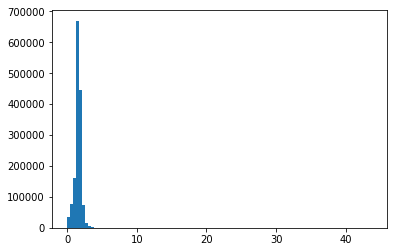

In [18]:
plt.hist(stellarmass_sigma_percent, bins = 100)
plt.show()

In [19]:
array_summary(stellarmass_sigma)

             Count:   1489670
              Mean:   0.1809006631374359
Standard Deviation:   0.05171306058764458
           Minimum:   0.0
           Maximum:   3.1589534282684326


In [27]:
select_low_logmass_error1 = (stellarmass_sigma < 0.24)
select_low_logmass_error2 = (stellarmass_sigma_percent < 2.1)

In [28]:
stellarmass_data_low_logmass_error = stellarmass_data[select_low_logmass_error2]

In [29]:
100 * len(stellarmass_data_low_logmass_error) / len(stellarmass_data)

90.9451086482241

In [30]:
stellarmass_objid = stellarmass_data_low_logmass_error['SPECOBJID'] #take the objid to match up with emlinkin catalogue

select_low_z_stellarmass = np.in1d(stellarmass_objid, low_z_objid) #create a mask to slice out sources that have data for both OIII/HB and stellar mass
select_mid_z_stellarmass = np.in1d(stellarmass_objid, mid_z_objid)

In [31]:
low_z_stellarmass_data  = stellarmass_data_low_logmass_error[select_low_z_stellarmass] #take the right data based on specobjid intersection
mid_z_stellarmass_data = stellarmass_data_low_logmass_error[select_mid_z_stellarmass]

In [32]:
low_z_stellarmass_data_objid = low_z_stellarmass_data['SPECOBJID'] #take the specobjid of the sources from the mask to then mask out the sources that do not have stellar mass data
mid_z_stellarmass_data_objid = mid_z_stellarmass_data['SPECOBJID']

In [33]:
select_clean_low_z = np.in1d(low_z_objid, low_z_stellarmass_data_objid) #now take the intersection between the emlinkin sources and those that have stellar mass data
select_clean_mid_z = np.in1d(mid_z_objid, mid_z_stellarmass_data_objid)

In [34]:
low_z_MEx_x = low_z_stellarmass_data['LOGMASS']
mid_z_MEx_x = mid_z_stellarmass_data['LOGMASS']

In [35]:
#classify galaxies based on BPT diagrams

# 0 unknown
# 1 star forming (HII)
# 2 composite
# 3 LINER
# 4 Seyfert

# for the rows
# 0 OIII/HB
# 1 NII/HA
# 2 SII/HA
# 3 classification

bpt_table = np.zeros((len(bpt_y), 4))
bpt_table[:, 0] = bpt_y
bpt_table[:, 1] = bpt1_x
bpt_table[:, 2] = bpt2_x

for row in bpt_table:
    
    #HII region
    if   ( ( row[0] - 1.3 ) * ( row[1] - 0.05 ) > 0.61 ) and ( ( row[0] - 1.3 ) * ( row[2] - 0.32 ) > 0.72 ):
        row[3] = 1
    
    #composite
    elif ( ( row[0] - 1.3 ) * ( row[1] - 0.05 ) < 0.61 ) and ( ( row[0] - 1.19) * ( row[1] - 0.47 ) > 0.61 ):
        row[3] = 2
        
    #LINER
    elif ( ( row[0] - 1.19 ) * ( row[1] - 0.47 ) < 0.61 ) and ( ( row[0] - 1.3 ) * (row[2] - 0.32) < 0.72 ) and ( row[0] < 1.89 * row[2] + 0.76 ):
        row[3] = 3
        
    #seyfert
    elif ( ( row[0] - 1.19 ) * ( row[1] - 0.47 ) < 0.61 ) and ( ( row[0] - 1.3 ) * (row[2] - 0.32) < 0.72 ) and ( row[0] > 1.89 * row[2] + 0.76 ):
        row[3] = 4
    
classification = bpt_table[:, 3] #convert the list into an array for faster processing
unique, counts = np.unique(classification, return_counts=True) #count occurences of each flag
ye = dict(zip(unique, counts)) #put into dictionary
print(ye) #print the dictionary to view the wing values

{0.0: 907, 1.0: 10145, 2.0: 4399, 3.0: 2265, 4.0: 1347}


In [36]:
#after the bpt_table is generated, we can easily make the low z MEx table

low_z_MEx_table = np.zeros((len(low_z_MEx_x), 3))

low_z_MEx_table[:, 0] = bpt_table[:, 0][select_clean_low_z]
low_z_MEx_table[:, 1] = low_z_MEx_x
low_z_MEx_table[:, 2] = bpt_table[:, 3][select_clean_low_z]

In [37]:
#now need OIII/HB for mid_z

mid_z_OIII_flux = mid_z_flux[:,17] #5007
mid_z_HB_flux = mid_z_flux[:,15] #4861

mid_z_MEx_y = np.log10(mid_z_OIII_flux / mid_z_HB_flux)[select_clean_mid_z] #take ratio and apply mask in one line

In [38]:
#classify galaxies based on MEx diagram

# 0 unknown
# 1 star forming (HII)
# 2 composite
# 3 AGN

# for the rows
# 0 OIII/HB
# 1 log mass
# 2 classification

mid_z_MEx_table = np.zeros((len(mid_z_MEx_y), 3))
mid_z_MEx_table[:, 0] = mid_z_MEx_y
mid_z_MEx_table[:, 1] = mid_z_MEx_x

for row in mid_z_MEx_table:
    
    #HII region
    if ( ( (row[0] - 1) * (row[1] - 10.5) ) > 0.37) and (row[0] < 800.492 - 217.328 * row[1] + 19.6431 * row[1] ** 2 - 0.591349 * row[1] ** 3):
        row[2] = 1
    
    #composite
    elif ( (row[0] < 594.753 - 167.074 * row[1] + 15.6748 * row[1] ** 2 - 0.491215 * row[1] ** 3) ) and ( (row[0] > 800.492 - 217.328 * row[1] + 19.6431 * row[1] ** 2 - 0.591349 * row[1] ** 3) ):
        row[2] = 2
    
    #AGN
    elif (row[0] > 594.753 - 167.074 * row[1] + 15.6748 * row[1] ** 2 - 0.491215 * row[1] ** 3) and  ( ( (row[0] - 1) * (row[1] - 10.5) ) < 0.37):
        row[2] = 3

        
for row in mid_z_MEx_table:
    if (row[2] == 0) and (row[0] > 0):
        row[2] = 3
        
    elif (row[2] == 0) and (row[0] < 0):
        row[2] = 1
    
classification = mid_z_MEx_table[:, 2] #convert the list into an array for faster processing
unique, counts = np.unique(classification, return_counts=True) #count occurences of each flag
ye = dict(zip(unique, counts)) #put into dictionary
print(ye) #print the dictionary to view the wing values

{1.0: 823, 2.0: 322, 3.0: 2570}


In [39]:
#generate all separating lines to show on plot

x = np.arange(-2.5, 0.05, 0.01)
x1 = np.arange(-2.5, 0.47, 0.01)
x2 = np.arange(-2.5, 0.32, 0.01)
x3 = np.arange(-0.31, 2, 0.01)

line = 0.61/(x - 0.05) + 1.3 # Kauffman et al. 2003 pure star formation line
line1 = 0.61/(x1 - 0.47) + 1.19 # Kewley et al. 2001 page16 extreme starburst line

line2 = 0.72/(x2 - 0.32) + 1.30 # Kewley et al. 2001 page16 extreme starburst line
line3 = 1.89 * x3 + 0.76 # Kewley et al. 2006 line that separates Seyferts and LINERs


MEx_line1_x = np.arange(0, 9.90, 0.01) #
MEx_line2_x = np.arange(9.91, 12.30, 0.01)
MEx_line3_x = np.arange(9.90, 11.20, 0.01)

MEx_line1_y = 0.37/(MEx_line1_x - 10.5) + 1
MEx_line2_y = 594.753 - 167.074 * MEx_line2_x + 15.6748 * MEx_line2_x ** 2 - 0.491215 * MEx_line2_x ** 3
MEx_line3_y = 800.492 - 217.328 * MEx_line3_x + 19.6431 * MEx_line3_x ** 2 - 0.591349 * MEx_line3_x ** 3

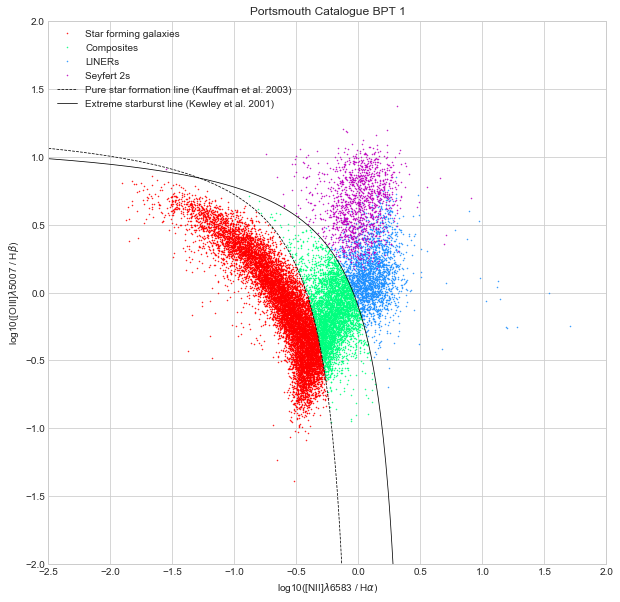

In [40]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(bpt_table[:, 1][bpt_table[:, 3] == 1], bpt_table[:, 0][bpt_table[:, 3] == 1], color = 'r', linestyle = '', marker = '.', ms = 1, label = 'Star forming galaxies')
plt.plot(bpt_table[:, 1][bpt_table[:, 3] == 2], bpt_table[:, 0][bpt_table[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 1, label = 'Composites')
plt.plot(bpt_table[:, 1][bpt_table[:, 3] == 3], bpt_table[:, 0][bpt_table[:, 3] == 3], color = 'dodgerblue', linestyle = '', marker = '.', ms = 1, label = 'LINERs')
plt.plot(bpt_table[:, 1][bpt_table[:, 3] == 4], bpt_table[:, 0][bpt_table[:, 3] == 4], color = 'm', ms = 1, linestyle = '', marker = '.', label = 'Seyfert 2s')

plt.plot(x, line, 'k--', linewidth = 0.75, label = 'Pure star formation line (Kauffman et al. 2003)' )
plt.plot(x1, line1, 'k-', linewidth = 0.75, label = 'Extreme starburst line (Kewley et al. 2001)')

plt.xlim(-2.5,2)
plt.ylim(-2,2)

plt.title('Portsmouth Catalogue BPT 1')
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)')
plt.xlabel(r'log10([NII]$\lambda$6583 / H$\alpha$)')
plt.legend()
# plt.savefig('portsmouth_catalogue_BPT1_2.png')
plt.show()

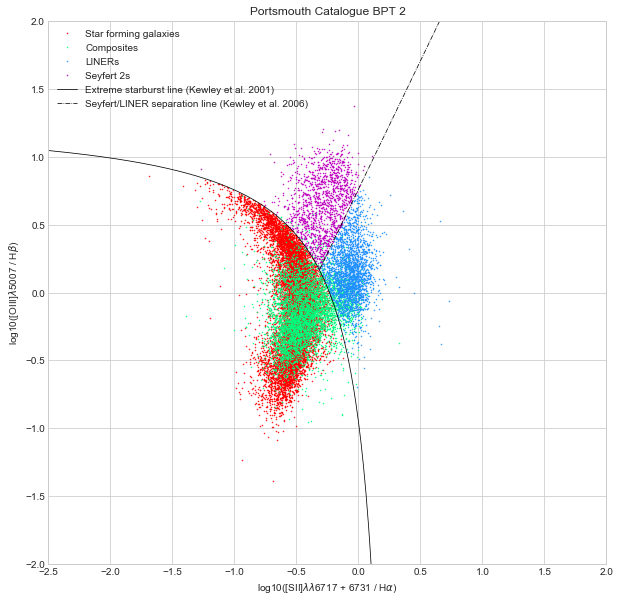

In [41]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(bpt_table[:, 2][bpt_table[:, 3] == 1], bpt_table[:, 0][bpt_table[:, 3] == 1], color = 'r', marker = '.', linestyle = '', ms = 1, label = 'Star forming galaxies')
plt.plot(bpt_table[:, 2][bpt_table[:, 3] == 2], bpt_table[:, 0][bpt_table[:, 3] == 2], color = 'springgreen', marker = '.', linestyle = '', ms = 1, label = 'Composites')
plt.plot(bpt_table[:, 2][bpt_table[:, 3] == 3], bpt_table[:, 0][bpt_table[:, 3] == 3], color = 'dodgerblue', marker = '.', linestyle = '', ms = 1, label = 'LINERs')
plt.plot(bpt_table[:, 2][bpt_table[:, 3] == 4], bpt_table[:, 0][bpt_table[:, 3] == 4], color = 'm', marker = '.', linestyle = '', ms = 1, label = 'Seyfert 2s')

plt.plot(x2, line2, 'k-', linewidth = 0.75, label = 'Extreme starburst line (Kewley et al. 2001)')
plt.plot(x3, line3, 'k-.', linewidth = 0.75, label = 'Seyfert/LINER separation line (Kewley et al. 2006)')

plt.xlim(-2.5,2)
plt.ylim(-2,2)

plt.title('Portsmouth Catalogue BPT 2')
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)')
plt.xlabel(r'log10([SII]$\lambda$$\lambda$6717 + 6731 / H$\alpha$)')
plt.legend()
# plt.savefig('portsmouth_catalogue_BPT2_op5.png')
plt.show()


In [42]:
select_SFG        = (low_z_MEx_table[:, 2] == 1)
select_composites = (low_z_MEx_table[:, 2] == 2)
select_LINER      = (low_z_MEx_table[:, 2] == 3)
select_S2         = (low_z_MEx_table[:, 2] == 4)

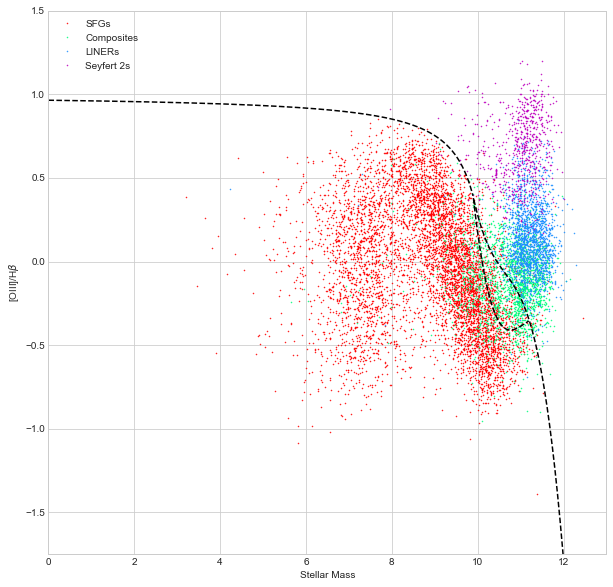

In [43]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(low_z_MEx_table[:, 1][select_SFG], low_z_MEx_table[:, 0][select_SFG], color = 'r', marker = '.', linestyle = '', ms = 1, label = 'SFGs')
plt.plot(low_z_MEx_table[:, 1][select_composites], low_z_MEx_table[:, 0][select_composites], color = 'springgreen', marker = '.', linestyle = '', ms = 1, label = 'Composites')
plt.plot(low_z_MEx_table[:, 1][select_LINER], low_z_MEx_table[:, 0][select_LINER], color = 'dodgerblue', marker = '.', linestyle = '', ms = 1, label = 'LINERs')
plt.plot(low_z_MEx_table[:, 1][select_S2], low_z_MEx_table[:, 0][select_S2], color = 'm', marker = '.', linestyle = '', ms = 1, label = 'Seyfert 2s')

plt.plot(MEx_line1_x, MEx_line1_y, 'k--')
plt.plot(MEx_line2_x, MEx_line2_y, 'k--')
plt.plot(MEx_line3_x, MEx_line3_y, 'k--')

plt.xlim(0,13)
plt.ylim(-1.75,1.5)

plt.ylabel(r'[OIII]/H$\beta$')
plt.xlabel('Stellar Mass')
plt.legend()
plt.show()

In [44]:
len(low_z_MEx_table)

11321

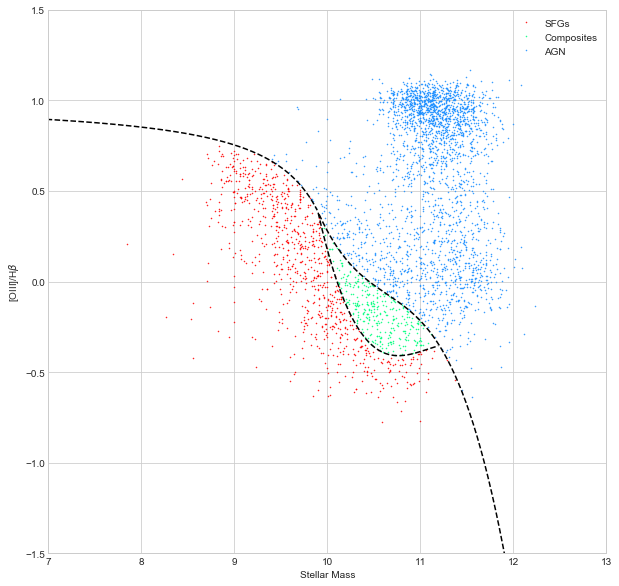

In [45]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))


plt.plot(mid_z_MEx_table[:,1][mid_z_MEx_table[:,2] == 1], mid_z_MEx_table[:,0][mid_z_MEx_table[:,2] == 1], color = 'r', marker = '.', linestyle = '', ms = 1, label = 'SFGs')
plt.plot(mid_z_MEx_table[:,1][mid_z_MEx_table[:,2] == 2], mid_z_MEx_table[:,0][mid_z_MEx_table[:,2] == 2], color = 'springgreen', marker = '.', linestyle = '', ms = 1, label = 'Composites')
plt.plot(mid_z_MEx_table[:,1][mid_z_MEx_table[:,2] == 3], mid_z_MEx_table[:,0][mid_z_MEx_table[:,2] == 3], color = 'dodgerblue', marker = '.', linestyle = '', ms = 1, label = 'AGN')

plt.plot(MEx_line1_x, MEx_line1_y, 'k--')
plt.plot(MEx_line2_x, MEx_line2_y, 'k--')
plt.plot(MEx_line3_x, MEx_line3_y, 'k--')

plt.xlim(7,13)
plt.ylim(-1.5, 1.5)

plt.ylabel(r'[OIII]/H$\beta$')
plt.xlabel('Stellar Mass')
plt.legend()
plt.show()

In [46]:
emlinkin_data.columns

ColDefs(
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'E'
    name = 'Z_ERR'; format = 'E'
    name = 'ZNUM'; format = 'J'
    name = 'VEL_STARS'; format = 'E'
    name = 'REDSHIFT'; format = 'E'
    name = 'SIGMA_STARS'; format = 'E'
    name = 'SIGMA_STARS_ERR'; format = 'E'
    name = 'CHISQ'; format = 'E'
    name = 'FILENAME'; format = '30A'
    name = 'BPT'; format = '13A'
    name = 'NAME'; format = '196A'; dim = '(7, 28)'
    name = 'LAMBDA'; format = '28E'
    name = 'KIND'; format = '84A'; dim = '(3, 28)'
    name = 'A'; format = '28E'
    name = 'V'; format = '28E'
    name = 'V_ERR'; format = '28E'
    name = 'SIG'; format = '28E'
    name = 'SIG_ERR'; format = '28E'
    name = 'AMPLITUDE'; format = '28E'
    name = 'AMPLITUDE_ERR'; format = '28E'
    name = 'FLUX'; format = '28E'
    name = 'FLUX_ERR'; format = '28E'
    name = 'EW'; f

In [39]:
stellarmass_maxlogmass = stellarmass_data['MAXLOGMASS']
stellarmass_minlogmass = stellarmass_data['MINLOGMASS']

stellarmass_diflogmass = stellarmass_maxlogmass - stellarmass_minlogmass

In [30]:
sm_mjd = stellarmass_data['MJD']
print(sm_mjd)

[55181 55181 55181 ... 56809 56809 56809]


In [32]:
array_summary(stellarmass_diflogmass)


             Count:   1489670
              Mean:   0.37666159868240356
Standard Deviation:   0.19454112648963928
           Minimum:   0.0
           Maximum:   5.59999942779541


In [33]:
len(stellarmass_diflogmass) - len(stellarmass_diflogmass[stellarmass_diflogmass < 0.8])

5231

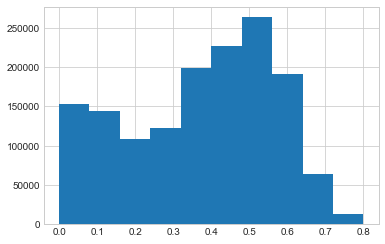

In [34]:
plt.hist(stellarmass_diflogmass[stellarmass_diflogmass < 0.8], bins = 10)
# plt.xlim(0,2)
# plt.yscale('log')
# plt.ylim(0,45000)
plt.xlabel('')
plt.show()

In [35]:
stellarmass_data.columns

ColDefs(
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'E'
    name = 'Z_ERR'; format = 'E'
    name = 'ZNUM'; format = 'I'
    name = 'MAGSCALED'; format = '5E'
    name = 'MAGSCALED_ERR'; format = '5E'
    name = 'REDUCEDCHI2'; format = 'E'
    name = 'AGE'; format = 'E'
    name = 'MINAGE'; format = 'E'
    name = 'MAXAGE'; format = 'E'
    name = 'E_BV'; format = 'E'
    name = 'LOGMASS'; format = 'E'
    name = 'MINLOGMASS'; format = 'E'
    name = 'MAXLOGMASS'; format = 'E'
    name = 'SFR'; format = 'E'
    name = 'MINSFR'; format = 'E'
    name = 'MAXSFR'; format = 'E'
    name = 'REDDENINGLAW'; format = 'J'
    name = 'NFILTER'; format = 'J'
    name = 'ABSMAGK'; format = 'E'
    name = 'MEDIANPDF'; format = 'E'
    name = 'PDF16'; format = 'E'
    name = 'PDF84'; format = 'E'
    name = 'PEAKPDF'; format = 'E'
    name = 'DELTA_REDUCEDCHI2

In [38]:
stellarmass_sigma4 = stellarmass_84percentile - stellarmass_logmasspeak
stellarmass_sigma5 = stellarmass_logmasspeak - stellarmass_16percentile
stellarmass_sigma6 = ( stellarmass_sigma4 + stellarmass_sigma5 ) /2

In [39]:
stellarmass_sigma7 = stellarmass_84percentile - stellarmass_logmassmedian
stellarmass_sigma8 = stellarmass_logmassmedian - stellarmass_16percentile
stellarmass_sigma9 = ( stellarmass_sigma7 + stellarmass_sigma8 ) /2

In [40]:
stellarmass_sigma1

array([0.35211307, 0.5633807 , 0.5432595 , ..., 0.48289692, 0.12072518,
       0.4929575 ], dtype=float32)

In [41]:
stellarmass_logmass_sigma = ( stellarmass_84percentile - stellarmass_16percentile ) / 2

In [42]:
array_summary(stellarmass_sigma3)

             Count:   1489670
              Mean:   0.1809006631374359
Standard Deviation:   0.05171306058764458
           Minimum:   0.0
           Maximum:   3.1589534282684326


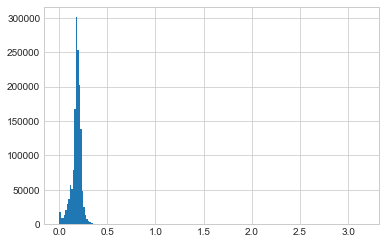

In [43]:
plt.hist(stellarmass_sigma3, bins = 200)
# plt.yscale('log')
plt.show()

In [44]:
array_summary(stellarmass_sigma6)

             Count:   1489670
              Mean:   0.17981529235839844
Standard Deviation:   0.05140276625752449
           Minimum:   0.0
           Maximum:   3.1399998664855957


In [45]:
array_summary(stellarmass_sigma9)

             Count:   1489670
              Mean:   0.17981529235839844
Standard Deviation:   0.05140276625752449
           Minimum:   0.0
           Maximum:   3.1399998664855957


In [46]:
array_summary(stellarmass_logmass_sigma)

             Count:   1489670
              Mean:   0.17981529235839844
Standard Deviation:   0.05140276625752449
           Minimum:   0.0
           Maximum:   3.1399998664855957


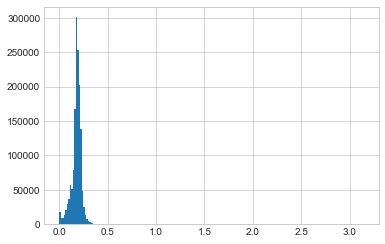

In [47]:
plt.hist(stellarmass_logmass_sigma, bins = 200)
# plt.yscale('log')
plt.show()

In [48]:
mid_z_Z = mid_z_emlinkin_data['Z'][select_clean_mid_z]
low_z_Z = low_z_emlinkin_data['Z'][select_clean_low_z]

low_z_OIIIHB = low_z_MEx_table[:, 0]
mid_z_OIIIHB = mid_z_MEx_table[:, 0]

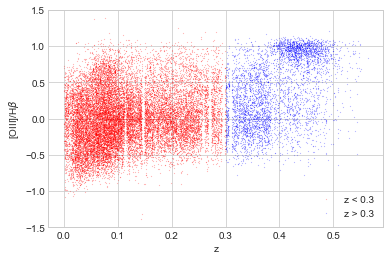

In [49]:
plt.plot(low_z_Z, low_z_OIIIHB, color = 'r', marker = '.', linestyle = '', ms = 0.2, label = 'z < 0.3')
plt.plot(mid_z_Z, mid_z_OIIIHB, color = 'b', marker = '.', linestyle = '', ms = 0.2, label = 'z > 0.3')
plt.ylim(-1.5,1.5)
plt.legend()

plt.xlabel('z')
plt.ylabel(r'[OIII]/H$\beta$')

plt.show()

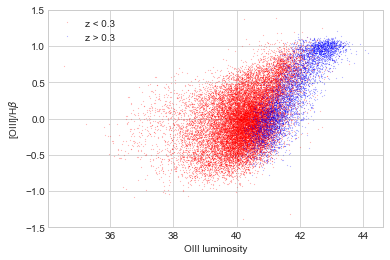

In [50]:
low_z_lum_dis = cosmo.luminosity_distance(low_z_emlinkin_data['Z'])
mid_z_lum_dis = cosmo.luminosity_distance(mid_z_emlinkin_data['Z'])

low_z_lum_dis = low_z_lum_dis.to(u.cm)
mid_z_lum_dis = mid_z_lum_dis.to(u.cm)

low_z_OIII_flux_correct_units = low_z_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
mid_z_OIII_flux_correct_units = mid_z_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))

low_z_OIII_lum = 4 * np.pi * low_z_OIII_flux_correct_units * (low_z_lum_dis ** 2)
mid_z_OIII_lum = 4 * np.pi * mid_z_OIII_flux_correct_units * (mid_z_lum_dis ** 2)

low_z_OIII_lum_clean = low_z_OIII_lum[select_clean_low_z]
mid_z_OIII_lum_clean = mid_z_OIII_lum[select_clean_mid_z]

low_z_OIII_loglum_clean = np.log10(np.array(low_z_OIII_lum_clean))
mid_z_OIII_loglum_clean = np.log10(np.array(mid_z_OIII_lum_clean))

plt.plot(low_z_OIII_loglum_clean, low_z_OIIIHB, color = 'r', marker = '.', linestyle = '', ms = 0.2, label = 'z < 0.3')
plt.plot(mid_z_OIII_loglum_clean, mid_z_OIIIHB, color = 'b', marker = '.', linestyle = '', ms = 0.2, label = 'z > 0.3')
plt.ylim(-1.5, 1.5)
plt.legend()

plt.ylabel(r'[OIII]/H$\beta$')
plt.xlabel('OIII luminosity')
plt.show()

In [51]:
mid_z_HB_EW = mid_z_emlinkin_data['EW'][:, 15][select_clean_mid_z]

In [52]:
mid_z_MEx_table2 = np.zeros((len(mid_z_HB_EW), 4))

mid_z_MEx_table2[:, 0] = mid_z_MEx_table[:, 0]
mid_z_MEx_table2[:, 1] = mid_z_MEx_table[:, 1]
mid_z_MEx_table2[:, 2] = mid_z_HB_EW

In [53]:
mid_z_MEx_table2

array([[-7.33043477e-02,  9.85000038e+00,  1.38649120e+01,
         0.00000000e+00],
       [-6.49796240e-03,  1.01400003e+01,  9.29444218e+00,
         0.00000000e+00],
       [ 1.93444461e-01,  1.06700001e+01,  6.07348871e+00,
         0.00000000e+00],
       ...,
       [-4.25082684e-01,  1.03900003e+01,  1.70543156e+01,
         0.00000000e+00],
       [-1.38347149e-01,  1.05900002e+01,  9.02573586e+00,
         0.00000000e+00],
       [-3.81918430e-01,  1.07100000e+01,  9.97287083e+00,
         0.00000000e+00]])

In [54]:
for row in mid_z_MEx_table2:
    
    if row[0] > 0.6 and row[1] > 10.2:
        row[3] = 1

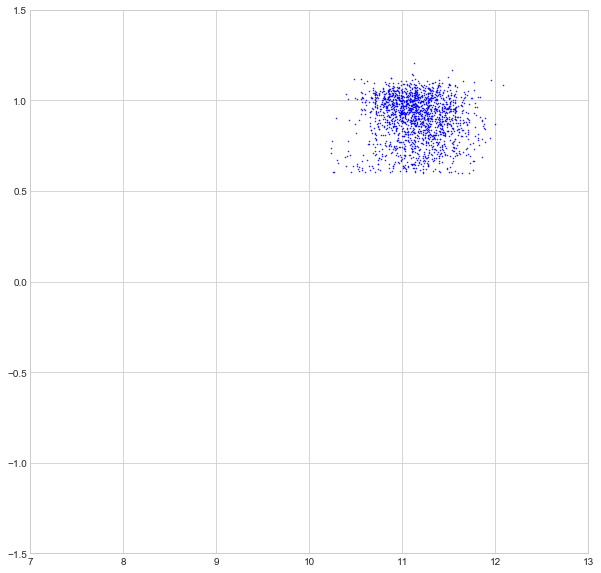

In [55]:
plt.figure(figsize=(10,10))

# plt.plot(low_z_Z, low_z_OIIIHB, color = 'r', marker = '.', linestyle = '', ms = 0.2, label = 'z < 0.3')
# plt.plot(mid_z_HB_EW, mid_z_OIIIHB, color = 'b', marker = '.', linestyle = '', ms = 0.2, label = 'z > 0.3')
# plt.plot(mid_z_HB_EW[mid_z_MEx_table[:, 2] == 3], mid_z_OIIIHB[mid_z_MEx_table[:, 2] == 3], color = 'r', marker = '.', linestyle = '', ms = 0.2, label = 'z > 0.3, agn')
plt.plot(mid_z_MEx_table2[:, 1][mid_z_MEx_table2[:, 3] == 1], mid_z_MEx_table2[:, 0][mid_z_MEx_table2[:, 3] == 1], color = 'b', marker = '.', linestyle = '', ms = 1, label = 'z > 0.3')
# plt.plot(mid_z_MEx_table2[:, 1], mid_z_MEx_table2[:, 0], color = 'r', marker = '.', linestyle = '', ms = 1, label = 'z > 0.3')

plt.ylim(-1.5,1.5)
plt.xlim(7, 13)
# plt.legend()

# plt.xlabel(r'H$\beta$ EW')
# plt.ylabel(r'[OIII]/H$\beta$')

plt.show()

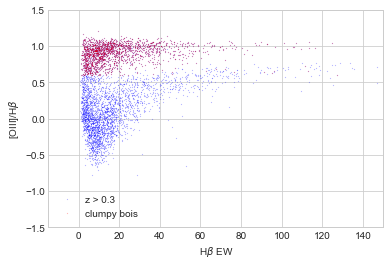

In [56]:
# plt.plot(low_z_Z, low_z_OIIIHB, color = 'r', marker = '.', linestyle = '', ms = 0.2, label = 'z < 0.3')
plt.plot(mid_z_HB_EW, mid_z_OIIIHB, color = 'b', marker = '.', linestyle = '', ms = 0.2, label = 'z > 0.3')
plt.plot(mid_z_MEx_table2[:, 2][mid_z_MEx_table2[:, 3] == 1], mid_z_MEx_table2[:, 0][mid_z_MEx_table2[:, 3] == 1], color = 'r', marker = '.', linestyle = '', ms = 0.2, label = 'clumpy bois')
# plt.plot(mid_z_HB_EW[mid_z_MEx_table[:, 2] == 3], mid_z_OIIIHB[mid_z_MEx_table[:, 2] == 3], color = 'r', marker = '.', linestyle = '', ms = 0.2, label = 'z > 0.3, agn')
plt.ylim(-1.5,1.5)
plt.xlim(right = 150)
plt.legend()

plt.xlabel(r'H$\beta$ EW')
plt.ylabel(r'[OIII]/H$\beta$')

plt.show()

In [57]:
[mid_z_MEx_table[:, 2] == 3]

[array([False, False,  True, ..., False, False, False])]

In [58]:
mid_z_clump_sources = mid_z_emlinkin_data[select_clean_mid_z]
mid_z_clump_sources = mid_z_clump_sources[mid_z_MEx_table2[:, 3] == 1]

In [59]:
ye = []
yez = []

for row in mid_z_clump_sources:
    fname = ('spec-' + str(row["PLATE"]) + '-' + str(row["MJD"]) + '-' + ('{:04}'.format(row["FIBERID"])) + '.fits')
    plate = str(row["PLATE"])
    direct = (plate + '/' + fname + '\n')
    url = 'http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/' + direct
    Z = row["Z"]
#     print(direct)
#     clump_list.write(direct)
    ye.append(url)
    yez.append(Z)

In [60]:
ye2 = np.random.choice(ye, 10)

In [61]:
for _ in ye2:
#     print(_[70:-1])
    print(_)

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3943/spec-3943-55336-0265.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3777/spec-3777-55210-0673.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3822/spec-3822-55544-0215.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3763/spec-3763-55508-0137.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/4604/spec-4604-55983-0193.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3753/spec-3753-55486-0233.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/4381/spec-4381-55824-0377.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/6174/spec-6174-56243-0141.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/5141/spec-5141-55746-0893.fits

http://data.sdss3.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/4209/spec-4209-55478-0299.fits



In [81]:
get_z = np.in1d(ye, ye2)

In [82]:
get_z

array([False, False, False, ..., False, False, False])

In [90]:
yez

[0.36634877,
 0.4011771,
 0.35654733,
 0.38480994,
 0.41581663,
 0.42451036,
 0.32998392,
 0.40101856,
 0.50313073,
 0.45296478,
 0.3446729,
 0.30052748,
 0.38196096,
 0.31936067,
 0.38085002,
 0.36174864,
 0.40997267,
 0.31203926,
 0.40506247,
 0.3790285,
 0.3057543,
 0.4051059,
 0.37897372,
 0.45729035,
 0.3057303,
 0.32519746,
 0.37888175,
 0.30575067,
 0.32528156,
 0.40489453,
 0.45731536,
 0.30574083,
 0.31898162,
 0.30575877,
 0.32528988,
 0.31943944,
 0.41595322,
 0.30012462,
 0.45745295,
 0.305764,
 0.32532555,
 0.30575195,
 0.48659775,
 0.3253272,
 0.3057385,
 0.3253216,
 0.3057569,
 0.39515927,
 0.30574203,
 0.4049448,
 0.30575827,
 0.4575387,
 0.30574408,
 0.48685145,
 0.30575928,
 0.41363865,
 0.33614406,
 0.3518527,
 0.3601162,
 0.47081196,
 0.35100135,
 0.47845793,
 0.31841025,
 0.41526505,
 0.46929696,
 0.32048184,
 0.41298252,
 0.38350758,
 0.38346237,
 0.44457996,
 0.43068674,
 0.43473172,
 0.45864284,
 0.5394932,
 0.31632757,
 0.34646976,
 0.4517315,
 0.3012131,
 0.30

In [92]:
get_Z = np.array(yez)[get_z]
print(get_Z)

[0.45737565 0.44447407 0.348809   0.4326872  0.50844723 0.35681644
 0.3336536  0.3048281  0.33517456 0.35859638]


In [96]:
(Table(mid_z_clump_sources)).write('mid_z_clump_sources2.fits')

In [97]:
mid_z_MEx_table

array([[-7.33043477e-02,  9.85000038e+00,  1.00000000e+00],
       [-6.49796240e-03,  1.01400003e+01,  2.00000000e+00],
       [ 1.93444461e-01,  1.06700001e+01,  3.00000000e+00],
       ...,
       [-4.25082684e-01,  1.03900003e+01,  1.00000000e+00],
       [-1.38347149e-01,  1.05900002e+01,  2.00000000e+00],
       [-3.81918430e-01,  1.07100000e+01,  2.00000000e+00]])

In [48]:
low_z_OIII_lum_clean

<Quantity [1.78513941e+41, 5.94953443e+39, 4.01348795e+40, ...,
           1.18880712e+41, 4.33248900e+39, 5.66471632e+40] erg / s>

In [26]:
len(MEx_low_z_x)

19882

In [27]:
-100 * (19882 - 20154) / 20154

1.3496080182594026

In [46]:
low_z_MEx_table = bpt_table[select_clean_low_z]

select_SFG        = (low_z_MEx_table[:, 3] == 1)
select_composites = (low_z_MEx_table[:, 3] == 2)
select_LINER      = (low_z_MEx_table[:, 3] == 3)
select_S2         = (low_z_MEx_table[:, 3] == 4)

In [47]:
MEx_line1_x = np.arange(0, 9.90, 0.01)
MEx_line2_x = np.arange(9.91, 12.30, 0.01)
MEx_line3_x = np.arange(9.90, 11.20, 0.01)

MEx_line1_y = 0.37/(MEx_line1_x - 10.5) + 1
MEx_line2_y = 594.753 - 167.074 * MEx_line2_x + 15.6748 * MEx_line2_x ** 2 - 0.491215 * MEx_line2_x ** 3
MEx_line3_y = 800.492 - 217.328 * MEx_line3_x + 19.6431 * MEx_line3_x ** 2 - 0.591349 * MEx_line3_x ** 3

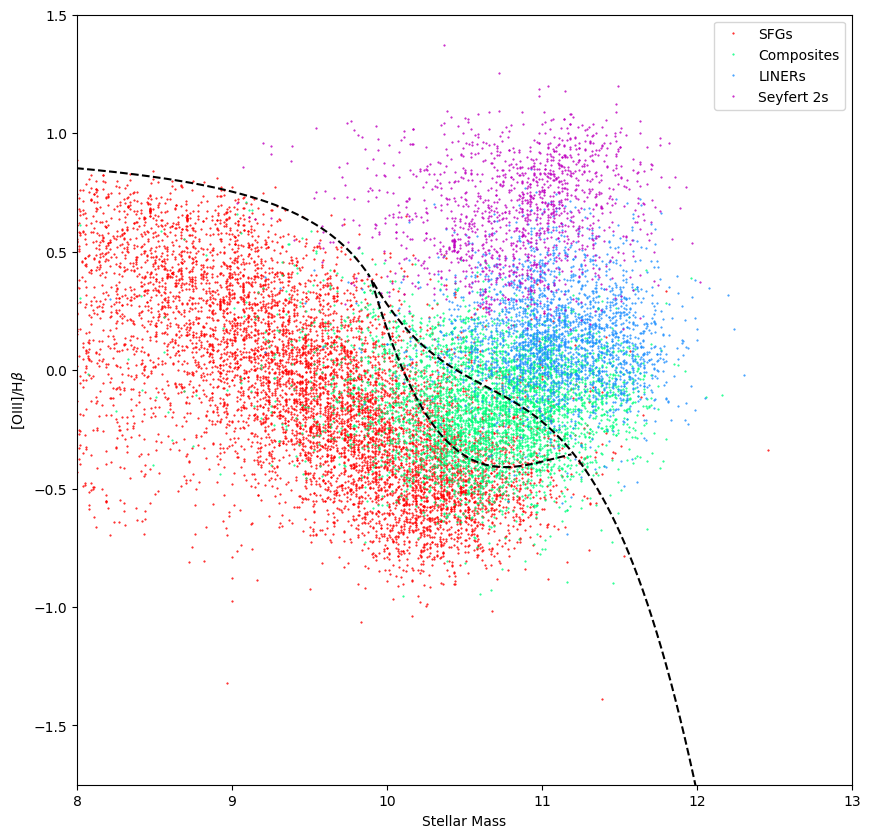

In [48]:
plt.style.use('default')
fig = plt.figure(figsize=(10,10))

plt.plot(MEx_low_z_x1[select_SFG], low_z_MEx_table[:, 0][select_SFG], color = 'r', marker = '.', linestyle = '', ms = 1, label = 'SFGs')
plt.plot(MEx_low_z_x1[select_composites], low_z_MEx_table[:, 0][select_composites], color = 'springgreen', marker = '.', linestyle = '', ms = 1, label = 'Composites')
plt.plot(MEx_low_z_x1[select_LINER], low_z_MEx_table[:, 0][select_LINER], color = 'dodgerblue', marker = '.', linestyle = '', ms = 1, label = 'LINERs')
plt.plot(MEx_low_z_x1[select_S2], low_z_MEx_table[:, 0][select_S2], color = 'm', marker = '.', linestyle = '', ms = 1, label = 'Seyfert 2s')

plt.plot(MEx_line1_x, MEx_line1_y, 'k--')
plt.plot(MEx_line2_x, MEx_line2_y, 'k--')
plt.plot(MEx_line3_x, MEx_line3_y, 'k--')

plt.xlim(8,13)
plt.ylim(-1.75,1.5)

plt.ylabel(r'[OIII]/H$\beta$')
plt.xlabel('Stellar Mass')
plt.legend()
plt.show()

In [71]:
print(len(MEx_low_z_x) - len(MEx_low_z_x[MEx_low_z_x > 7]))

1535


In [49]:
mid_z_OIII_flux = mid_z_flux[:,17] #5007
mid_z_HB_flux = mid_z_flux[:,15] #4861

NameError: name 'mid_z_flux' is not defined

In [78]:
MEx_mid_z_y = mid_z_OIII_flux / mid_z_HB_flux
MEx_mid_z_y = MEx_mid_z_y[select_clean_mid_z]
MEx_mid_z_y = np.log10(MEx_mid_z_y)
MEx_mid_z_x = mid_z_stellar_mass_data['LOGMASS']

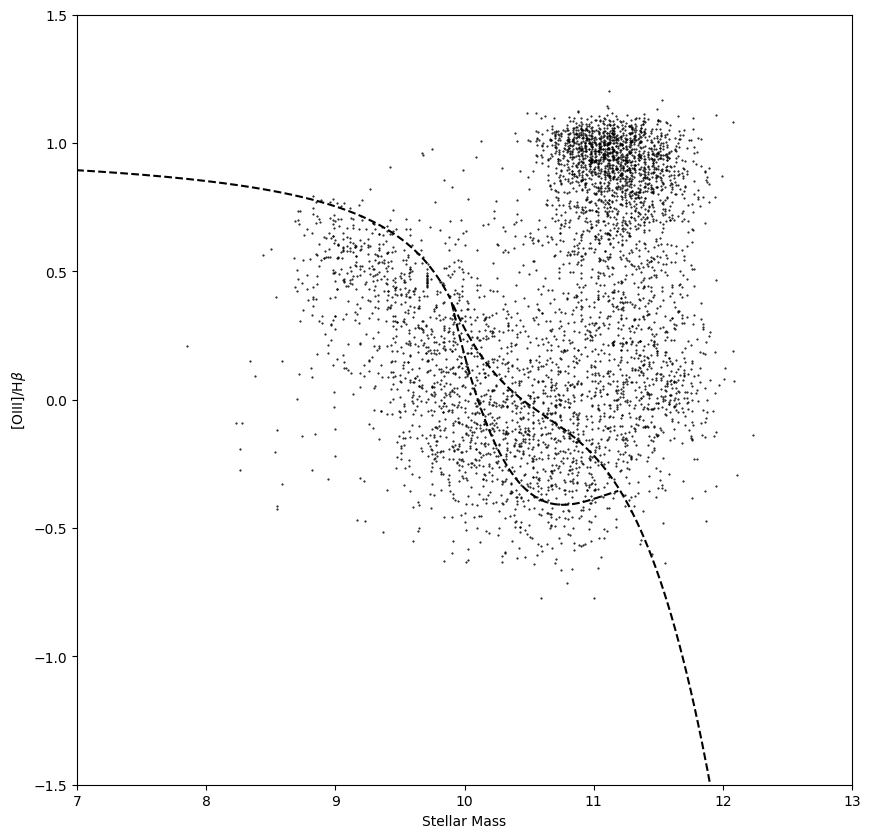

In [75]:
plt.style.use('default')
fig = plt.figure(figsize=(10,10))

plt.plot(MEx_high_z_x, MEx_high_z_y, color = 'k', marker = '.', linestyle = '', ms = 1)
# plt.plot(MEx_low_z_x[select_composites], low_z_MEx_table[:, 0][select_composites], color = 'springgreen', marker = '.', linestyle = '', ms = 1, label = 'Composites')
# plt.plot(MEx_low_z_x[select_LINER], low_z_MEx_table[:, 0][select_LINER], color = 'dodgerblue', marker = '.', linestyle = '', ms = 1, label = 'LINERs')
# plt.plot(MEx_low_z_x[select_S2], low_z_MEx_table[:, 0][select_S2], color = 'm', marker = '.', linestyle = '', ms = 1, label = 'Seyfert 2s')

plt.plot(MEx_line1_x, MEx_line1_y, 'k--')
plt.plot(MEx_line2_x, MEx_line2_y, 'k--')
plt.plot(MEx_line3_x, MEx_line3_y, 'k--')

plt.xlim(7,13)
plt.ylim(-1.5, 1.5)

plt.ylabel(r'[OIII]/H$\beta$')
plt.xlabel('Stellar Mass')
# plt.legend()
plt.show()

In [117]:
# 0 unknown
# 1 star forming (HII)
# 2 composite
# 3 AGN

# for the rows
# 0 OIII/HB
# 1 log mass
# 2 classification

high_z_MEx_table = np.zeros((len(MEx_high_z_y), 3))
high_z_MEx_table[:, 0] = MEx_high_z_y
high_z_MEx_table[:, 1] = MEx_high_z_x

for row in high_z_MEx_table:
    
    #HII region
    if ( ( (row[0] - 1) * (row[1] - 10.5) ) > 0.37) and (row[0] < 800.492 - 217.328 * row[1] + 19.6431 * row[1] ** 2 - 0.591349 * row[1] ** 3):
        row[2] = 1
    
    #composite
    elif ( (row[0] < 594.753 - 167.074 * row[1] + 15.6748 * row[1] ** 2 - 0.491215 * row[1] ** 3) ) and ( (row[0] > 800.492 - 217.328 * row[1] + 19.6431 * row[1] ** 2 - 0.591349 * row[1] ** 3) ):
        row[2] = 2
    
    #AGN
    elif (row[0] > 594.753 - 167.074 * row[1] + 15.6748 * row[1] ** 2 - 0.491215 * row[1] ** 3) and  ( ( (row[0] - 1) * (row[1] - 10.5) ) < 0.37):
        row[2] = 3

        
for row in high_z_MEx_table:
    if (row[2] == 0) and (row[0] > 0):
        row[2] = 3
        
    elif (row[2] == 0) and (row[0] < 0):
        row[2] = 1
    
classification = high_z_MEx_table[:, 2] #convert the list into an array for faster processing
unique, counts = np.unique(classification, return_counts=True) #count occurences of each flag
ye = dict(zip(unique, counts)) #put into dictionary
print(ye) #print the dictionary to view the wing values

{1.0: 1100, 2.0: 402, 3.0: 3053}


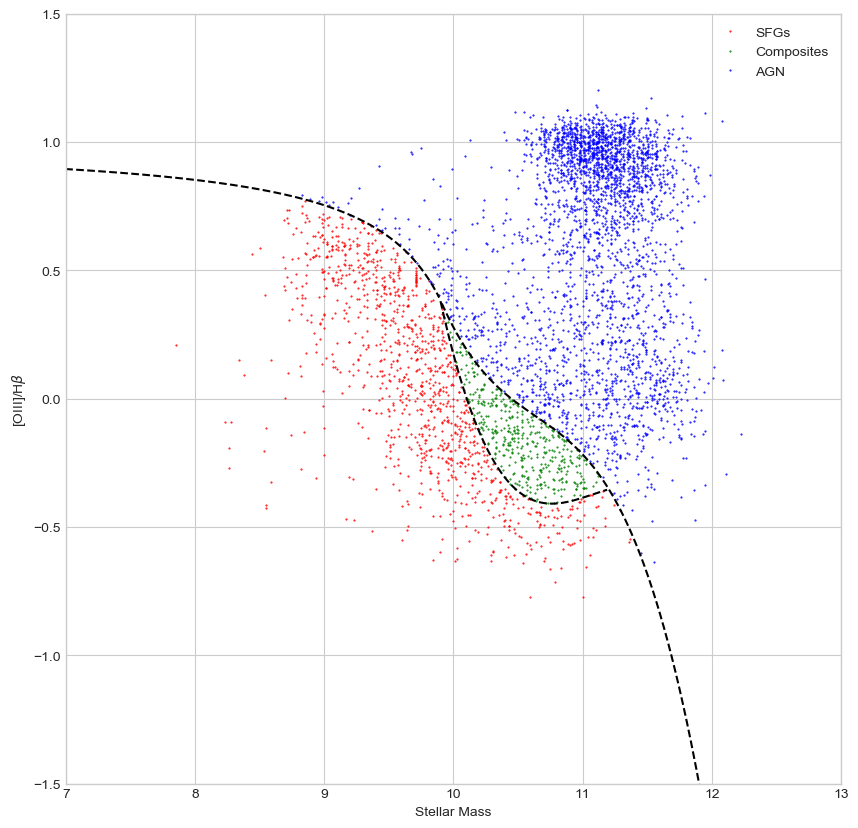

In [122]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))


plt.plot(high_z_MEx_table[:,1][high_z_MEx_table[:,2] == 1], high_z_MEx_table[:,0][high_z_MEx_table[:,2] == 1], color = 'r', marker = '.', linestyle = '', ms = 1, label = 'SFGs')
plt.plot(high_z_MEx_table[:,1][high_z_MEx_table[:,2] == 2], high_z_MEx_table[:,0][high_z_MEx_table[:,2] == 2], color = 'g', marker = '.', linestyle = '', ms = 1, label = 'Composites')
plt.plot(high_z_MEx_table[:,1][high_z_MEx_table[:,2] == 3], high_z_MEx_table[:,0][high_z_MEx_table[:,2] == 3], color = 'b', marker = '.', linestyle = '', ms = 1, label = 'AGN')

plt.plot(MEx_line1_x, MEx_line1_y, 'k--')
plt.plot(MEx_line2_x, MEx_line2_y, 'k--')
plt.plot(MEx_line3_x, MEx_line3_y, 'k--')

plt.xlim(7,13)
plt.ylim(-1.5, 1.5)

plt.ylabel(r'[OIII]/H$\beta$')
plt.xlabel('Stellar Mass')
plt.legend()
plt.show()

In [ ]:
MEx_line1_y = 0.37/(MEx_line1_x - 10.5) + 1
MEx_line2_y = 594.753 - 167.074 * MEx_line2_x + 15.6748 * MEx_line2_x ** 2 - 0.491215 * MEx_line2_x ** 3
MEx_line3_y = 800.492 - 217.328 * MEx_line3_x + 19.6431 * MEx_line3_x ** 2 - 0.591349 * MEx_line3_x ** 3

In [116]:
# high_z_sources = open('high_z_sources.txt')

# ye2 = []

# for _ in high_z_sources:
#     ye2.append(_)
# print(len(ye2))

# high_z_sources.close()

4569


In [123]:
# plate = []
# mjd = []
# fiberid = []

# for _ in ye2:
#     identifiers = _.split(',')
    
#     plate.append(identifiers[0])
#     mjd.append(identifiers[1])
#     fiberid.append(identifiers[2])
    
# plate = np.array(plate)
# mjd = np.array(mjd)
# fiberid = np.array(fiberid)
    
# identifiers_table = np.zeros((len(plate), 3))
# identifiers_table[:, 0] = plate
# identifiers_table[:, 1] = mjd
# identifiers_table[:, 2] = fiberid

In [124]:
print(identifiers_table)

[[ 3587. 55182.   136.]
 [ 3587. 55182.   354.]
 [ 3587. 55182.   906.]
 ...
 [ 7565. 56809.   838.]
 [ 7565. 56809.   844.]
 [ 7565. 56809.   845.]]


In [112]:
"""

attempted naive k-clustering

"""

'\n\nattempted naive k-clustering\n\n'

In [80]:
centres = [[0, -0.75, 0], [1, 0, 0]]
centres = np.array(centres)
centres = np.transpose(centres)

In [81]:
clusters = np.zeros((len(bpt_x4), 6))

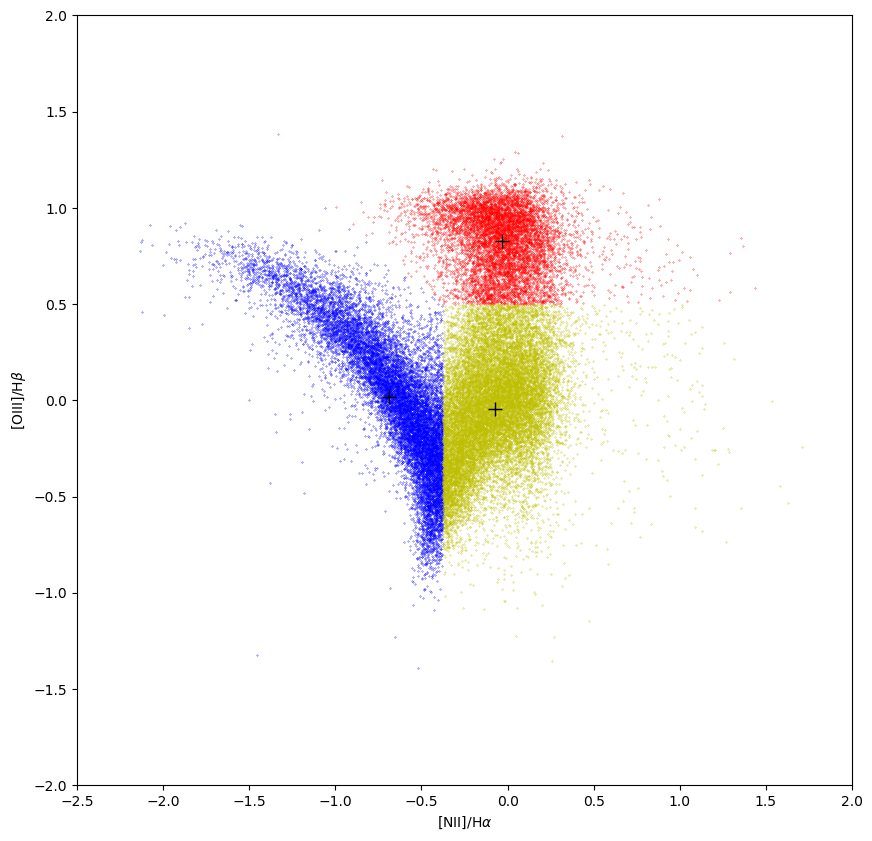

<Figure size 640x480 with 0 Axes>

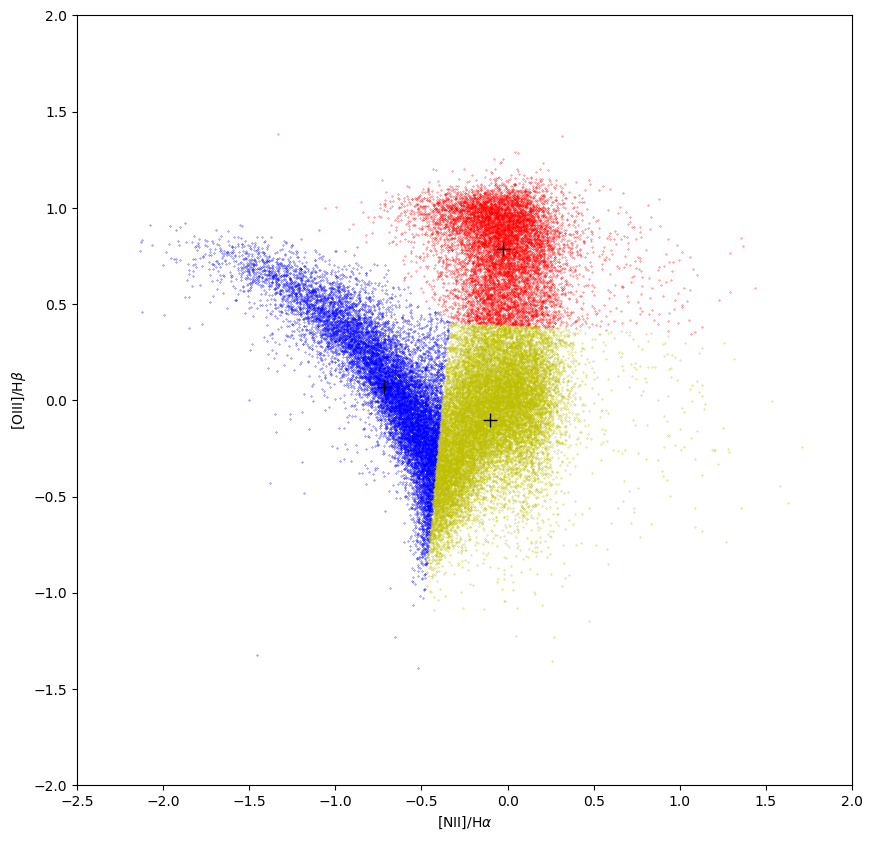

<Figure size 640x480 with 0 Axes>

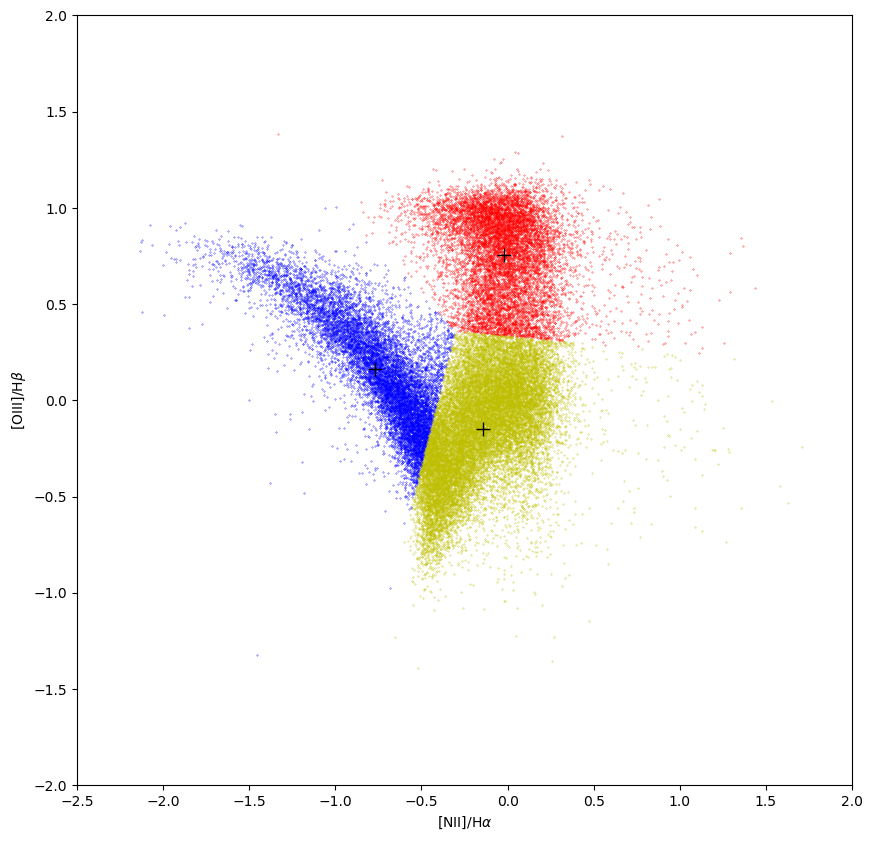

<Figure size 640x480 with 0 Axes>

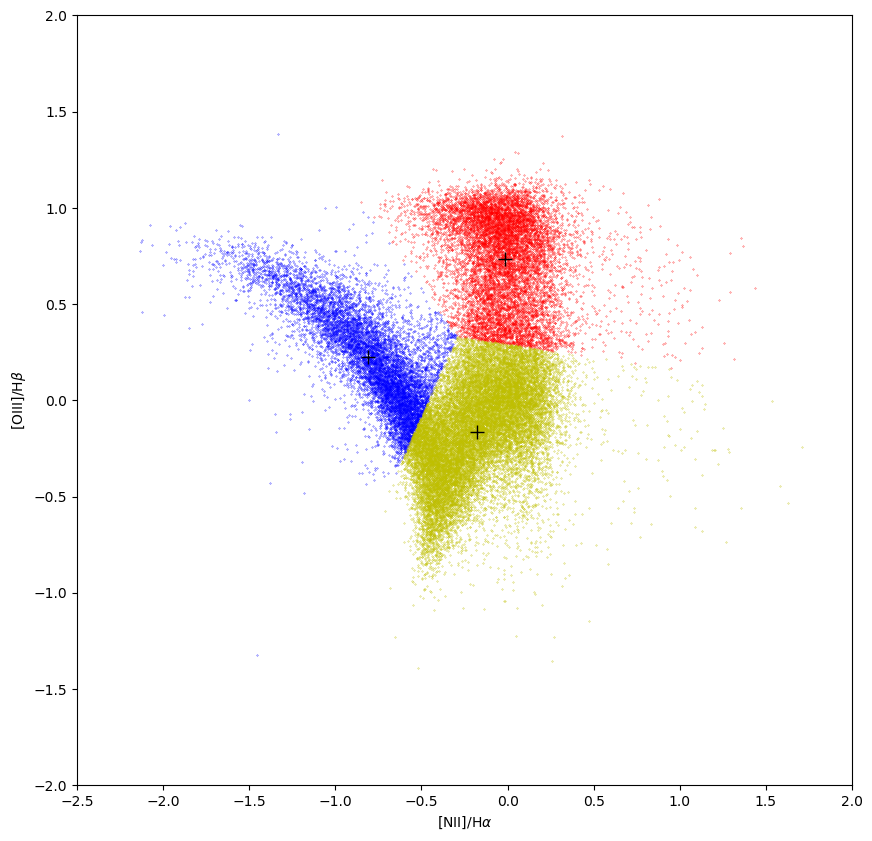

<Figure size 640x480 with 0 Axes>

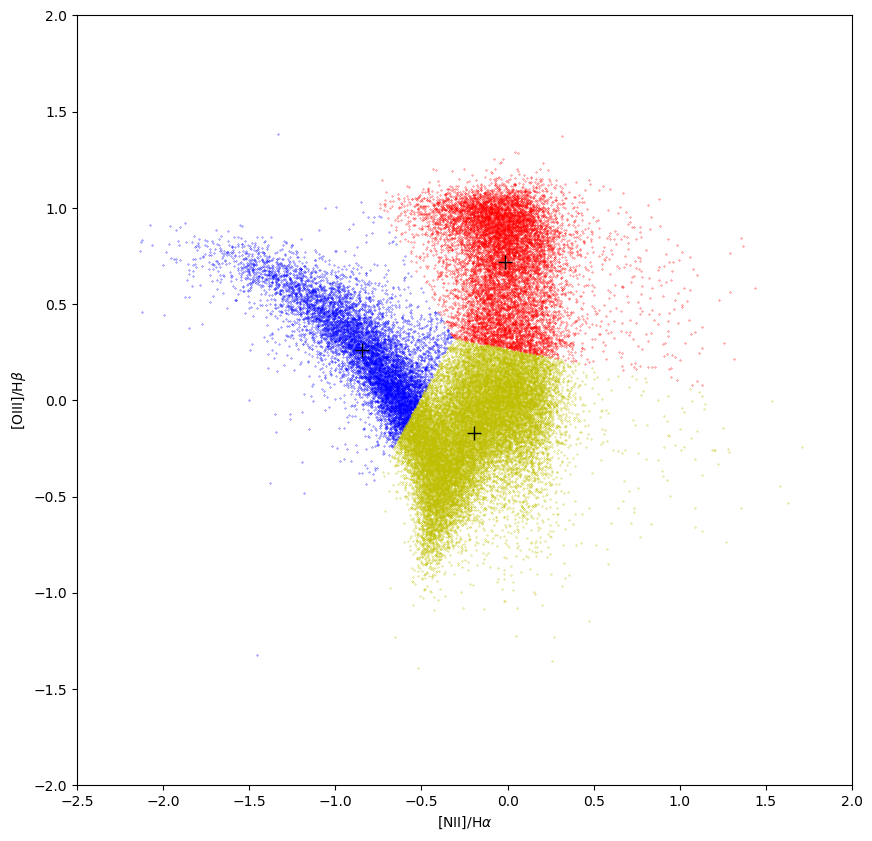

<Figure size 640x480 with 0 Axes>

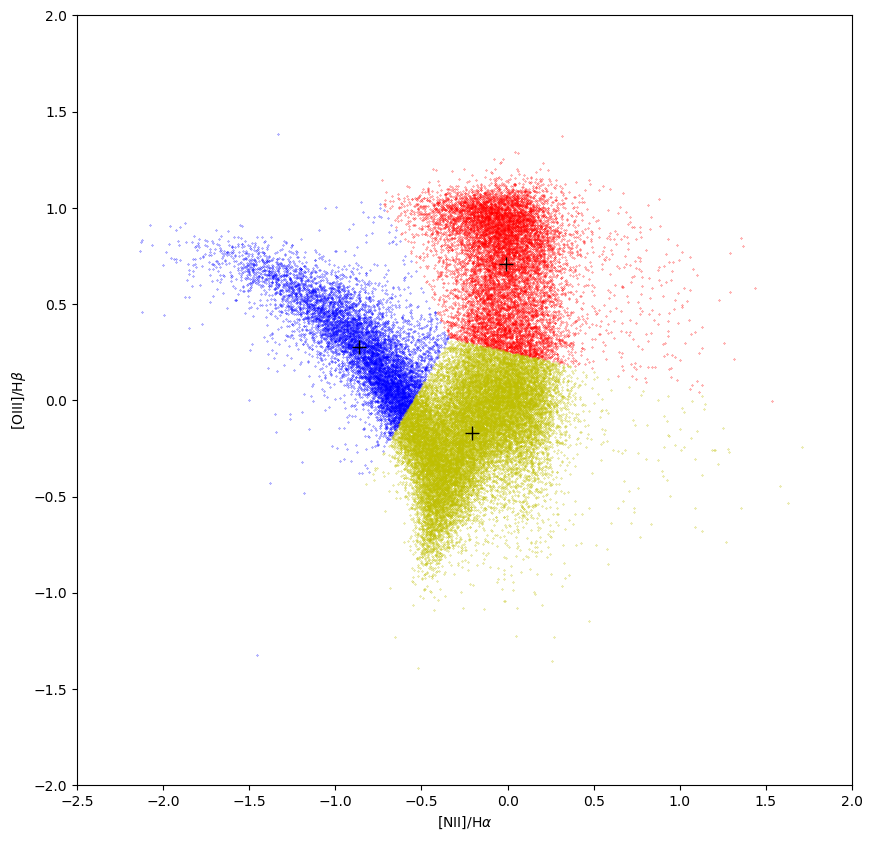

<Figure size 640x480 with 0 Axes>

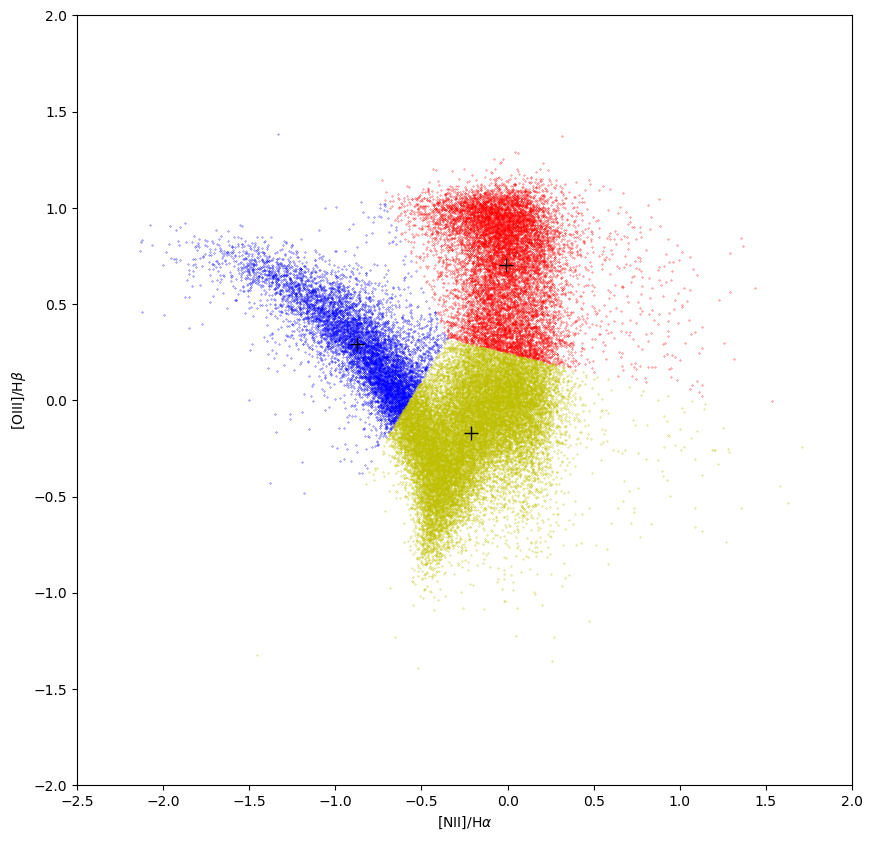

<Figure size 640x480 with 0 Axes>

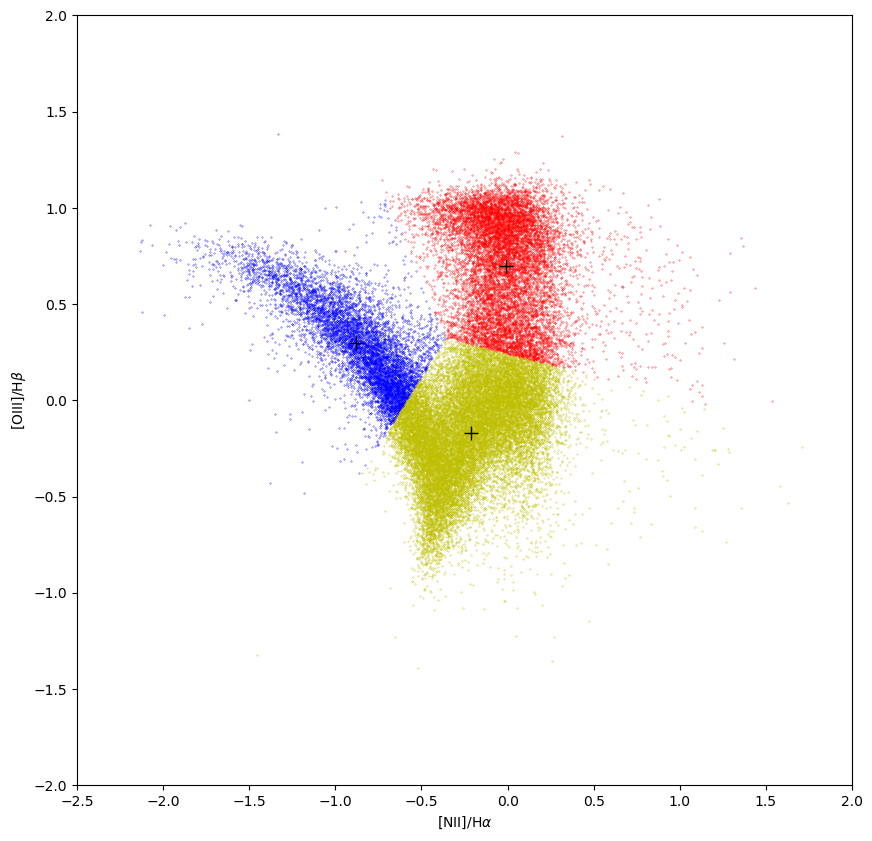

<Figure size 640x480 with 0 Axes>

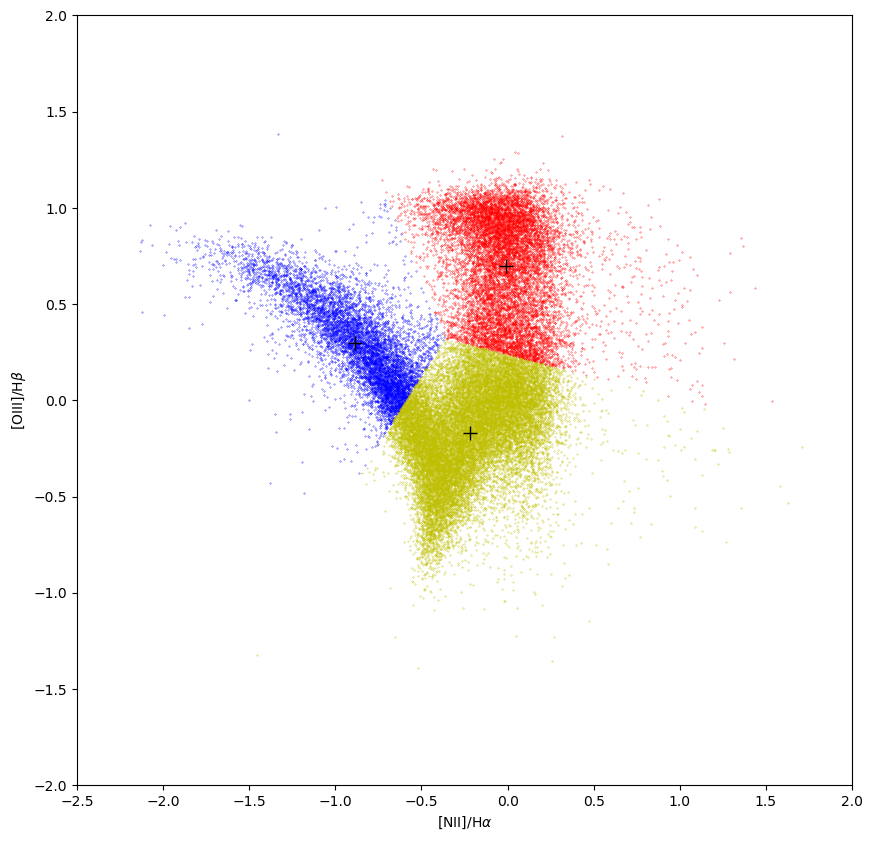

<Figure size 640x480 with 0 Axes>

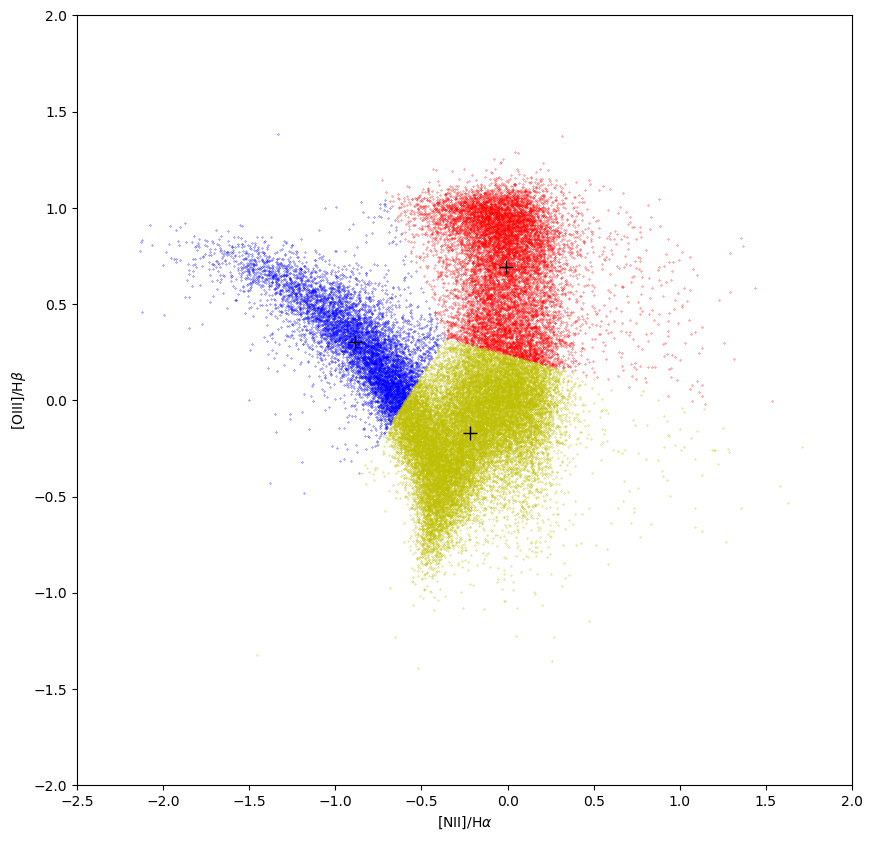

<Figure size 640x480 with 0 Axes>

In [86]:
centres = [[0, -0.75, 0], [1, 0, 0]]
centres = np.array(centres)
centres = np.transpose(centres)

clusters = np.zeros((len(bpt_x4), 6))

clusters[:, 0] = bpt_x4
clusters[:, 1] = bpt_y4

#columns 2, 3, 4 are distances to each center



for iteration in range(10):
    clusters[:, 2] = np.sqrt( (clusters[:, 0] - centres[:, 0][0]) ** 2 + (clusters[:, 1] - centres[:, 1][0]) ** 2 )
    clusters[:, 3] = np.sqrt( (clusters[:, 0] - centres[:, 0][1]) ** 2 + (clusters[:, 1] - centres[:, 1][1]) ** 2 )
    clusters[:, 4] = np.sqrt( (clusters[:, 0] - centres[:, 0][2]) ** 2 + (clusters[:, 1] - centres[:, 1][2]) ** 2 )
    
    for r in clusters:
        
        if np.min(r[2:5]) == r[2]:
            r[5] = 1
            
        elif np.min(r[2:5]) == r[3]:
            r[5] = 2
            
        elif np.min(r[2:5]) == r[4]:
            r[5] = 3
            
    #redefine centres
    
    centres[0][0] = np.mean(clusters[:, 0][clusters[:,5] == 1])
    centres[0][1] = np.mean(clusters[:, 1][clusters[:,5] == 1])
    
    centres[1][0] = np.mean(clusters[:, 0][clusters[:,5] == 2])
    centres[1][1] = np.mean(clusters[:, 1][clusters[:,5] == 2])
    
    centres[2][0] = np.mean(clusters[:, 0][clusters[:,5] == 3])
    centres[2][1] = np.mean(clusters[:, 1][clusters[:,5] == 3])
    
    plt.style.use('default')
    fig = plt.figure(figsize=(10,10))
    
    plt.plot(clusters[:, 0][clusters[:,5] == 1], clusters[:, 1][clusters[:,5] == 1], 'r.', ms = 0.5)
    plt.plot(clusters[:, 0][clusters[:,5] == 2], clusters[:, 1][clusters[:,5] == 2], 'b.', ms = 0.5)
    plt.plot(clusters[:, 0][clusters[:,5] == 3], clusters[:, 1][clusters[:,5] == 3], 'y.', ms = 0.5)
    plt.plot(centres[:, 0], centres[:,1], 'k+', ms = 10)
    
    plt.xlim(-2.5,2)
    plt.ylim(-2,2)
    plt.ylabel(r'[OIII]/H$\beta$')
    plt.xlabel(r'[NII]/H$\alpha$')
    plt.show()
    plt.clf()

In [74]:
clusters

array([[ 2.24162475e-03,  1.73721984e-02,  6.77392650e-01,
         9.37671789e-01,  2.93002208e-01,  3.00000000e+00],
       [-1.30625442e-01,  8.26854050e-01,  1.79884249e-01,
         9.21521544e-01,  1.00541156e+00,  1.00000000e+00],
       [-1.86894223e-01,  2.69305874e-02,  6.91138077e-01,
         7.56311152e-01,  2.04141178e-01,  3.00000000e+00],
       ...,
       [-2.69599944e-01, -4.66648728e-01,  1.19029217e+00,
         9.90308123e-01,  2.96329885e-01,  3.00000000e+00],
       [-1.29042283e-01, -2.30911821e-02,  7.27802496e-01,
         8.28889549e-01,  1.76284493e-01,  3.00000000e+00],
       [-1.29933029e-01,  2.68133044e-01,  4.43463482e-01,
         7.61164479e-01,  4.51674341e-01,  1.00000000e+00]])

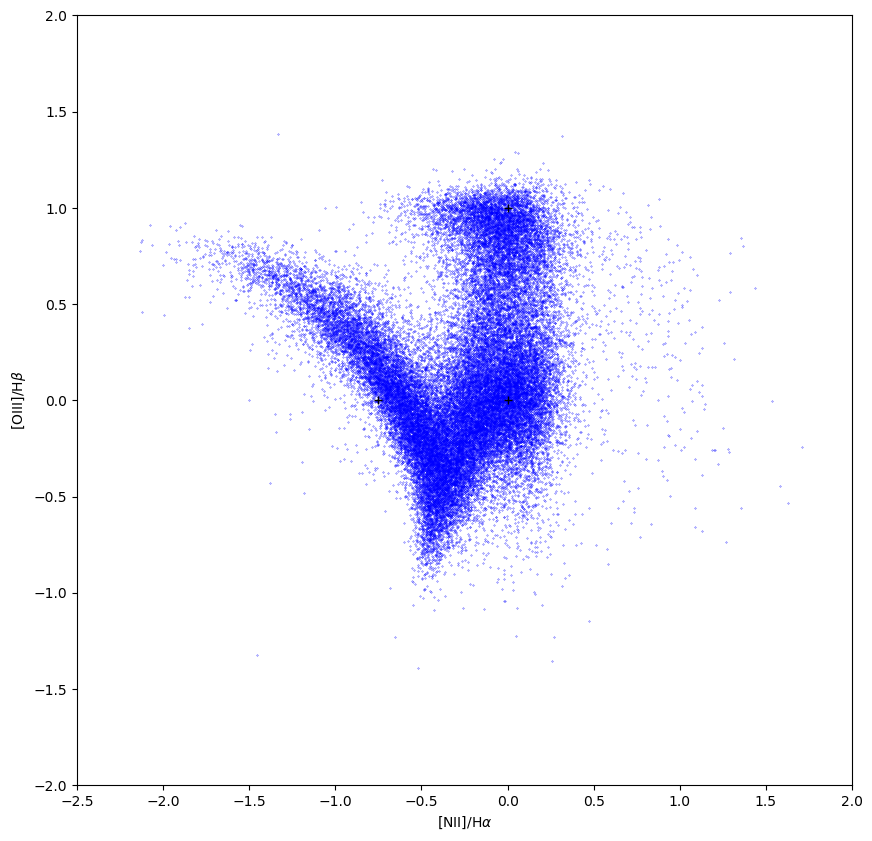

In [54]:
plt.style.use('default')
fig = plt.figure(figsize=(10,10))
plt.plot(bpt_x,bpt_y,'b.', ms = 0.5)
plt.plot(centres[0], centres[1], 'k+')
# plt.plot(bpt_x3,bpt_y3,'r.', ms = 0.5)
# plt.plot(x,line,'b', ms = 0.2)
plt.xlim(-2.5,2)
plt.ylim(-2,2)
plt.ylabel(r'[OIII]/H$\beta$')
plt.xlabel(r'[NII]/H$\alpha$')
plt.show()

In [38]:
ye = np.arange(0, 15)
ye = [ye, ye]

ye = np.array(ye)
print(ye[:, -1])
print(ye[:, -2])

[14 14]
[13 13]


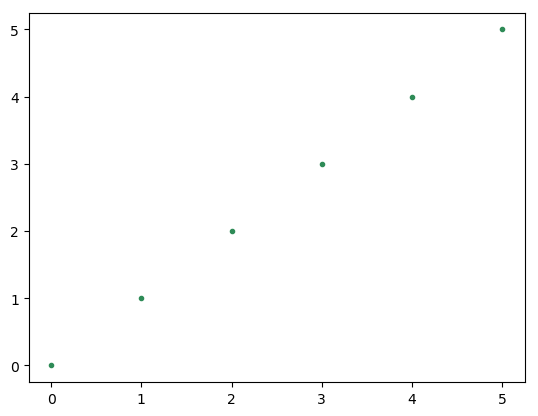

In [90]:
plt.plot([0,1,2,3,4,5], [0,1,2,3,4,5], color = 'seagreen', marker = '.', linestyle = '')

In [14]:
x1 = np.arange(9.00, 9.90, 0.01)
x2 = np.arange(9.91, 12.30, 0.01)
x3 = np.arange(9.90, 11.20, 0.01)

y1 = 0.37/(x1 - 10.5) + 1
y2 = 594.753 - 167.074 * x2 + 15.6748 * x2 ** 2 - 0.491215 * x2 ** 3
y3 = 800.492 - 217.328 * x3 + 19.6431 * x3 ** 2 - 0.591349 * x3 ** 3

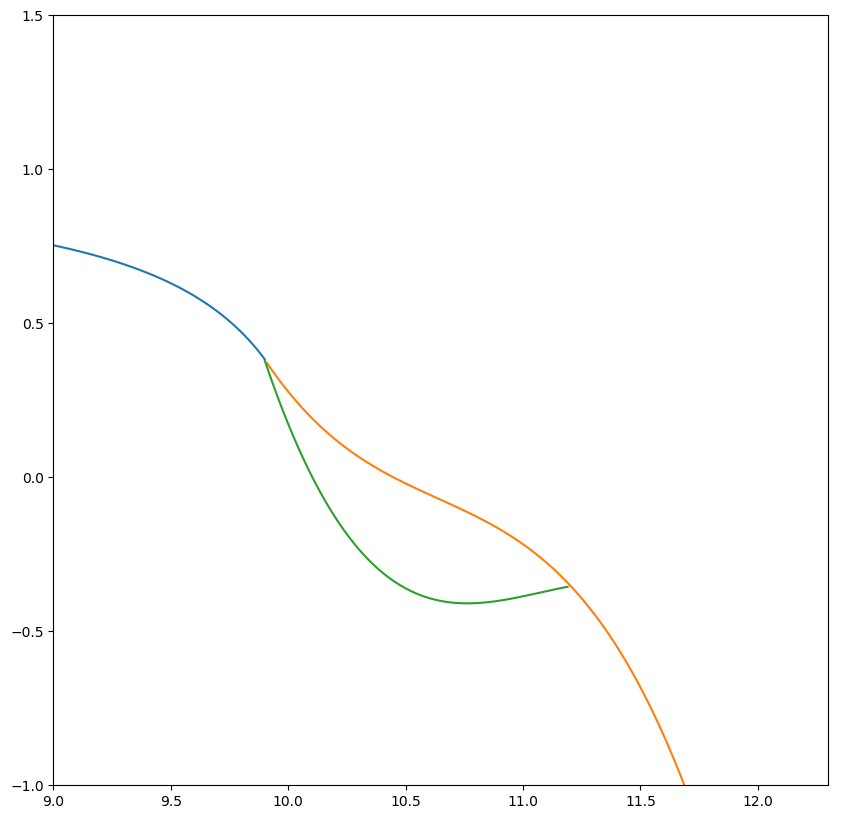

In [15]:
plt.style.use('default')
fig = plt.figure(figsize=(10,10))

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

plt.xlim(9,12.3)
plt.ylim(-1,1.5)
# plt.ylabel(r'[OIII]/H$\beta$')
# plt.xlabel(r'[NII]/H$\alpha$')
plt.show()